<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_13_Attention_mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 어텐션 메커니즘 쉽게 이해하기: 도서관에서 책 찾기 비유

### 어텐션 메커니즘을 **도서관에서 원하는 책을 찾는 과정**으로 비유해 보겠습니다. 이 과정에서 **Query, Key, Value**가 각각 어떤 역할을 하는지 이해해봅시다.

## 1. Query, Key, Value의 역할

### Query (질문)
- **Query**는 여러분이 찾고자 하는 책의 주제입니다.
- 예를 들어, 여러분이 도서관 사서에게 "**고양이에 대한 책을 찾고 싶어요**"라고 요청하는 것이 **Query**에 해당합니다.

### Key (키워드들)
- 도서관에는 많은 책들이 있고, 각 책에는 **키워드**들이 정리되어 있습니다.
- 예를 들어, 책에는 **"고양이", "동물", "가족", "취미"** 같은 키워드가 붙어 있습니다.
- 즉, **Key**는 각 책의 주제나 특징을 나타내며, 이를 통해 책을 찾을 수 있게 해주는 정보입니다.

### Value (책의 내용)
- **Value**는 실제로 각 책의 **내용**입니다.
- 사서가 찾은 책을 여러분에게 보여줄 때, 그 책의 전체 내용이 바로 **Value**입니다. 실제 정보를 담고 있는 것이죠.

## 2. 어텐션 메커니즘의 동작 원리

### 1. Query를 통해 관련된 책 찾기
- 여러분은 사서에게 "**고양이에 대한 책을 찾고 싶어요 (Query)**"라고 요청합니다.
- 사서는 도서관의 모든 책을 확인하며, 각 책에 붙어 있는 **Key (키워드)**와 여러분의 **Query**를 비교합니다.
- **고양이**라는 키워드가 붙어 있는 책을 찾으면, 그 책이 여러분의 Query와 연관이 있다고 판단합니다.

### 2. 유사도 점수 계산
- 사서는 각 책의 키워드가 여러분의 요청과 **얼마나 잘 맞는지 계산**합니다.
  - **고양이** 키워드가 있는 책은 높은 점수를 받습니다.
  - 반면에 **가족**이나 **취미**와 같은 키워드가 있는 책은 고양이와 관련이 없으므로 낮은 점수를 받습니다.

### 3. Softmax로 중요한 책 결정
- 도서관에는 관련된 책이 여러 권 있을 수 있습니다.
- 사서는 이 책들 중 가장 관련이 높은 것들을 선택하고, 각 책이 얼마나 관련이 있는지에 따라 **가중치**를 부여합니다.
- 예를 들어, 고양이에 대한 책이 가장 관련이 높고, 동물 일반에 대한 책도 어느 정도 관련이 있을 수 있습니다.
- 이 과정에서 사용되는 것이 **Softmax**입니다. 이를 통해 각 책이 얼마나 중요한지 결정하고, 그 중요도에 따라 책들을 추천합니다.

### 4. Value를 반환
- 이제, 사서는 여러분에게 책을 꺼내서 보여줍니다. 이 책의 내용이 바로 **Value**입니다.
- 여러분이 원했던 정보에 따라, 사서는 관련 있는 책들을 더 많이, 덜 관련 있는 책은 적게 보여줄 수 있습니다.

## 3. 전체적으로 이해하기

- **Query**: 여러분이 알고 싶은 질문이나 찾고자 하는 주제입니다.
- **Key**: 도서관의 모든 책에 붙어 있는 **키워드**와 같은 정보입니다. 이것을 통해 어떤 책이 여러분의 질문과 관련이 있는지를 찾습니다.
- **Value**: 실제 **책의 내용**으로, 여러분이 읽고 정보를 얻을 수 있는 부분입니다.

**어텐션 메커니즘**은 여러분이 도서관에서 책을 찾는 것처럼, 입력된 정보(토큰)들 사이에서 어떤 정보가 현재 찾고자 하는 내용(Query)과 관련이 있는지를 계산하고, 그 결과로 **중요한 정보를 더 많이 반영해 새로운 출력을 만드는 과정**이라고 할 수 있습니다.

이를 통해 모델은 문장에서 중요한 부분에 더 많은 주의를 기울여 적절한 결과를 생성하게 되는 것입니다.

---

이렇게 비유를 통해 **Query, Key, Value**의 역할을 쉽게 이해할 수 있습니다. 어텐션 메커니즘은 정보를 효율적으로 찾고 반영하는 데 있어 핵심적인 역할을 합니다.

In [ ]:
import torch
import torch.nn.functional as F

# Query, Key, Value 벡터 정의
define_query = torch.tensor([[1.0, 0.0, 1.0]])  # 여러분의 질문 (고양이에 대한 책을 찾고 싶어요)
define_keys = torch.tensor([[1.0, 0.5, 1.0],  # 책 1: 고양이 관련 책
                           [0.5, 1.0, 0.5],  # 책 2: 동물 일반 관련 책
                           [0.0, 0.5, 1.0]])  # 책 3: 취미 관련 책
define_values = torch.tensor([[10.0, 0.0, 5.0],   # 책 1의 내용
                              [1.0, 2.0, 3.0],    # 책 2의 내용
                              [0.0, 0.5, 1.0]])   # 책 3의 내용

# 1. Query와 Key 간의 유사도 계산 (어텐션 스코어)
attention_scores = torch.matmul(define_query, define_keys.T)
print(f'{define_query.shape}, {define_keys.T.shape}')
# Step 1 결과: tensor([[2., 1., 1.]])
# Query와 각 Key 사이의 유사도를 계산한 결과입니다. 첫 번째 책(Key)과 가장 높은 유사도(2)를 가집니다.
print("Step 1: Query와 Key 간의 유사도 계산")
print(attention_scores)



torch.Size([1, 3]), torch.Size([3, 3])
Step 1: Query와 Key 간의 유사도 계산
tensor([[2., 1., 1.]])


In [ ]:

# 2. Softmax를 사용해 유사도를 확률로 변환 (책이 얼마나 관련이 있는지 결정)
attention_weights = F.softmax(attention_scores, dim=-1)
# Step 2 결과: tensor([[0.5761, 0.2119, 0.2119]])
# Softmax를 사용해 각 책과의 유사도를 확률 값으로 변환한 결과입니다. 첫 번째 책이 57.61%로 가장 관련이 높습니다.
print("\nStep 2: Softmax를 사용한 유사도 확률로 변환")
print(attention_weights)



Step 2: Softmax를 사용한 유사도 확률로 변환
tensor([[0.5761, 0.2119, 0.2119]])


In [ ]:

# 3. 가중치를 사용해 Value 반환 (중요한 책 내용 반영)
attention_output = torch.matmul(attention_weights, define_values)
# Step 3 결과: tensor([[5.9731, 0.5299, 3.7284]])
# 각 책의 내용을 가중치만큼 곱하여 합산한 결과입니다. 가장 관련이 높은 첫 번째 책의 내용이 더 많이 반영되었습니다.
print("\nStep 3: 가중치를 사용한 Value 반환")
print(attention_output)

# 출력된 내용은 각 책의 내용을 가중치만큼 곱해서 합산한 결과로, 중요도가 높은 책의 내용이 더 반영됩니다.




Step 3: 가중치를 사용한 Value 반환
tensor([[5.9731, 0.5299, 3.7284]])


In [ ]:
import numpy as np
from gensim.models import Word2Vec

# 도서관에서 책을 찾는 과정에 비유한 예시
# 이 코드는 도서관에서 원하는 책을 찾고 해당 책의 내용을 요약하여 정보를 얻는 과정을 모델링합니다.
# Query는 도서관에서 우리가 찾고자 하는 내용을 설명하는 요청입니다.
# Key는 도서관에 있는 책들의 카탈로그입니다. 각 책이 무엇에 관한 것인지 설명하고 있습니다.
# Value는 책의 실제 내용, 즉 우리가 얻고자 하는 정보입니다.

# 예시 영어 문장 데이터 (도서관의 책 내용이라고 생각해 봅시다)
sentences = [
    "The quick brown fox jumps over the lazy dog",
    "A fast blue hare leaps over a sleepy hound",
    "The agile squirrel climbs up the tall oak tree",
    "A slow turtle crawls under the green bush",
    "The red bird flies across the blue sky"
]

# 각 문장을 토큰화합니다. (책의 내용을 단어 단위로 나누는 과정)
tokenized_sentences = [sentence.lower().split() for sentence in sentences]
print("토큰화된 문장:")
print(tokenized_sentences)


토큰화된 문장:
[['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'], ['a', 'fast', 'blue', 'hare', 'leaps', 'over', 'a', 'sleepy', 'hound'], ['the', 'agile', 'squirrel', 'climbs', 'up', 'the', 'tall', 'oak', 'tree'], ['a', 'slow', 'turtle', 'crawls', 'under', 'the', 'green', 'bush'], ['the', 'red', 'bird', 'flies', 'across', 'the', 'blue', 'sky']]


In [ ]:

# Word2Vec 모델을 학습합니다. (각 단어를 벡터로 변환하여 표현하는 단계)
model = Word2Vec(sentences=tokenized_sentences, vector_size=4, window=3, min_count=1, sg=0)
print("\nWord2Vec 모델 학습 완료.")



Word2Vec 모델 학습 완료.


In [ ]:

# Query, Key, Value 벡터 생성
# 예시로 'fox', 'hare', 'squirrel'에 대해 Query, Key, Value 벡터를 추출합니다.
# 'fox'는 우리가 찾고자 하는 정보(Query), 'hare'는 관련 있는 책(Key), 'squirrel'은 최종 정보를 담고 있는 내용(Value)입니다.
query_word = 'fox'  # 우리가 도서관에서 찾고자 하는 내용
key_word = 'hare'    # 도서관에 있는 책의 주제
value_word = 'squirrel'  # 도서관에서 찾은 책의 실제 내용

# Query, Key, Value 벡터 계산
query_vector = model.wv[query_word]
key_vector = model.wv[key_word]
value_vector = model.wv[value_word]

print("\nQuery 벡터 (단어 '{}'):".format(query_word))
print(query_vector)
print("Key 벡터 (단어 '{}'):".format(key_word))
print(key_vector)
print("Value 벡터 (단어 '{}'):".format(value_word))
print(value_vector)



Query 벡터 (단어 'fox'):
[-0.18800586 -0.09841785 -0.18778937 -0.02326501]
Key 벡터 (단어 'hare'):
[ 0.12466763  0.2306477  -0.20380454  0.11230064]
Value 벡터 (단어 'squirrel'):
[-0.04335568  0.16771552  0.24913052 -0.1091353 ]


In [ ]:

# 어텐션 점수 계산 과정
# Query와 Key의 내적(dot product)을 계산하여 유사도를 구합니다.
# 이것은 우리가 찾고자 하는 내용(Query)와 책(Key) 간의 관련성을 계산하는 것입니다.
attention_raw_score = np.dot(query_vector, key_vector)  # Query와 Key의 내적 계산
print("\n내적 (어텐션 원시 점수) - '{}'와 '{}'의 유사도:".format(query_word, key_word))
print(attention_raw_score)



내적 (어텐션 원시 점수) - 'fox'와 'hare'의 유사도:
-0.010478445


In [ ]:

# 소프트맥스를 사용하여 어텐션 점수를 확률로 변환합니다.
# 책(Key)이 우리가 찾고자 하는 정보(Query)와 얼마나 관련이 있는지를 확률로 나타냅니다.
attention_score = np.exp(attention_raw_score) / np.sum(np.exp([attention_raw_score]))
print("\n소프트맥스를 적용한 어텐션 스코어 (단어 '{}'과 관련된 확률):".format(key_word))
print(attention_score)



소프트맥스를 적용한 어텐션 스코어 (단어 'hare'과 관련된 확률):
1.0


In [ ]:

# 어텐션 스코어를 이용해 Value에 가중치를 부여하여 최종 컨텍스트 벡터 계산
# 찾고자 하는 정보와 관련된 책의 내용(Value)을 어텐션 스코어로 가중합하여 최종 정보를 얻습니다.
context_vector = attention_score * value_vector
print("\n컨텍스트 벡터 (어텐션 스코어가 적용된 '{}'):".format(value_word))
print(context_vector)



컨텍스트 벡터 (어텐션 스코어가 적용된 'squirrel'):
[-0.04335568  0.16771552  0.24913052 -0.1091353 ]


In [ ]:
import numpy as np
from scipy.special import softmax
from gensim.models import Word2Vec

# 샘플 문장: "고양이에 대한 책을 찾고 싶어요", "강아지에 대한 책을 찾고 싶어요", "새에 대한 책을 찾고 싶어요"
sentences = [
    ["고양이", "책", "찾고", "싶어요"],
    ["강아지", "책", "찾고", "싶어요"],
    ["호랑이", "책", "찾고", "싶어요"],
]

# Word2Vec 모델을 학습하여 각 단어의 임베딩 벡터 생성
# vector_size=3: 각 단어를 3차원 벡터로 표현
# min_count=1: 최소 단어 빈도가 1 이상인 단어만 포함
# window=3: 주변 단어의 최대 거리
# sg=0: CBOW(Continuous Bag of Words) 알고리즘 사용
model = Word2Vec(sentences, vector_size=3, min_count=1, sg=0)

# 각 토큰의 임베딩 벡터 추출
# tokens 리스트에는 분석하고자 하는 단어들이 포함되어 있음
tokens = ["고양이", "책", "찾고", "싶어요"]

# Query 벡터 설정
# "고양이"에 해당하는 단어의 임베딩 벡터를 Query로 사용
Q = model.wv["고양이"]  # Query는 우리가 찾고자 하는 주제와 같음
print("Query Vector (Q):", Q)

# Key 벡터 설정
# 모든 토큰의 임베딩 벡터를 Key로 사용
K = np.array([model.wv[token] for token in tokens])  # 각 단어의 벡터가 Key로 설정됨
print("Key Vectors (K):\n", K)

# Value 벡터 설정
# 모든 토큰의 임베딩 벡터를 Value로 사용
V = np.array([model.wv[token] for token in tokens])  # 각 단어의 벡터가 Value로 설정됨
print("Value Vectors (V):\n", V)

# 단계 1: Query와 Key 벡터의 내적을 통한 유사도 계산
# 각 Key 벡터와 Query 벡터 간의 내적을 계산하여 유사도를 구함
# 유사도는 Query와 각 Key가 얼마나 관련이 있는지를 나타냄
print(K.shape, Q.shape)
dot_products = np.dot(K, Q)  # Query와 Key 간의 내적을 통해 유사도를 계산
print("Dot Products (유사도 값):", dot_products)

# 단계 2: Softmax를 사용하여 가중치 계산
# 유사도 값을 Softmax 함수에 통과시켜 각 단어의 가중치를 계산
# Softmax를 통해 유사도를 확률 분포로 변환하여 각 단어의 중요도를 결정함
attention_weights = softmax(dot_products)
print("Attention Weights (가중치):", attention_weights)

# 결과 해석하기
# 각 토큰에 대해 가중치와 함께 출력하여 어떤 단어가 중요한지 확인
# 가중치가 높을수록 Query와 해당 단어(Key)가 더 관련이 깊음을 의미
for i, token in enumerate(tokens):
    print(f"Token: {token}, Weight: {attention_weights[i]:.3f}")

Query Vector (Q): [-0.06053392  0.09588599  0.03306246]
Key Vectors (K):
 [[-0.06053392  0.09588599  0.03306246]
 [ 0.21529575  0.2990996  -0.16718094]
 [ 0.3003091  -0.31009832 -0.23722696]
 [-0.01787424  0.00788105  0.17011166]]
Value Vectors (V):
 [[-0.06053392  0.09588599  0.03306246]
 [ 0.21529575  0.2990996  -0.16718094]
 [ 0.3003091  -0.31009832 -0.23722696]
 [-0.01787424  0.00788105  0.17011166]]
(4, 3) (3,)
Dot Products (유사도 값): [ 0.01395161  0.01011935 -0.05575628  0.00746199]
Attention Weights (가중치): [0.25494772 0.25397253 0.23778114 0.25329855]
Token: 고양이, Weight: 0.255
Token: 책, Weight: 0.254
Token: 찾고, Weight: 0.238
Token: 싶어요, Weight: 0.253


1. **Query 벡터 (Q)**  
   - Query Vector (Q): `[-0.00987271 -0.25537467 0.32049143]`  
   - Query 벡터는 '고양이'라는 단어의 벡터입니다. 이 벡터는 Word2Vec 모델이 학습하여 '고양이'라는 단어의 의미를 고차원 공간에서 표현한 것입니다.  
   - 이 벡터는 '고양이'와 관련된 문맥을 잘 표현합니다.

2. **Key 벡터 (K)**  
   - Key Vectors (K):  
     ```  
     [[-0.00987271 -0.25537467  0.32049143]  
      [ 0.30029878 -0.3100974  -0.23723243]  
      [ 0.21529575  0.2990996  -0.16718094]  
      [-0.01783989  0.00779883  0.17014965]]  
     ```  
   - 각 Key 벡터는 각각의 단어 ('고양이', '책', '찾고', '싶어요')에 해당하는 벡터입니다.  
   - Key 벡터들은 Query 벡터와의 유사도를 측정하기 위해 사용됩니다. 이 유사도는 Query와 각 Key 간의 내적으로 계산됩니다.

3. **Value 벡터 (V)**  
   - Value Vectors (V):  
     ```  
     [[-0.00987271 -0.25537467  0.32049143]  
      [ 0.30029878 -0.3100974  -0.23723243]  
      [ 0.21529575  0.2990996  -0.16718094]  
      [-0.01783989  0.00779883  0.17014965]]  
     ```  
   - Value 벡터들은 Key 벡터와 동일합니다. 이 벡터들은 최종적으로 가중합을 계산하여 컨텍스트 벡터를 만드는 데 사용될 수 있습니다.

4. **Query와 Key 간의 내적을 통한 유사도 계산**  
   - Dot Products (유사도 값): `[0.16802844, 0.00019529, -0.13208807, 0.05271601]`  
   - 각 Key 벡터와 Query 벡터의 내적을 통해 유사도 값을 계산합니다.  
   - '고양이' (Query)와 각 단어(Key) 간의 유사도가 벡터의 내적을 통해 결정됩니다.  
   - 결과적으로, 각 값은 Query와 해당 단어(Key)의 관련성을 나타냅니다.  
   - **'고양이'**와 가장 높은 유사도 값을 가지는 것은 자기 자신으로서 `0.168`입니다.  
   - '책', '찾고', '싶어요'와의 유사도는 상대적으로 낮습니다.

5. **Softmax를 통한 가중치 계산**  
   - Attention Weights (가중치): `[0.28757823, 0.24314593, 0.21301837, 0.2562574]`  
   - 유사도 값을 Softmax 함수에 통과시켜 가중치를 계산합니다.  
   - Softmax를 통해 유사도 값을 확률 분포로 변환하여, 각 단어가 얼마나 중요한지를 나타내는 가중치가 됩니다.  
   - 결과적으로 가중치 합은 1이 되며, 이 값들은 각 단어가 Query와 관련이 얼마나 깊은지를 나타냅니다.

6. **각 토큰에 대한 가중치 해석**  
   - Token: '고양이', Weight: `0.288`  
   - Token: '책', Weight: `0.243`  
   - Token: '찾고', Weight: `0.213`  
   - Token: '싶어요', Weight: `0.256`  
   - **'고양이'**의 가중치가 `0.288`로 가장 높습니다. 이는 당연히 Query와 동일한 단어이므로 가장 관련이 깊다고 판단되기 때문입니다.  
   - **'싶어요'**와 **'책'**도 각각 `0.256`과 `0.243`의 가중치를 가지며, 이 단어들이 문장에서 '고양이'와 어느 정도 관련이 있다고 판단됩니다.  
   - **'찾고'**의 가중치는 가장 낮은 `0.213`입니다. 이는 '고양이'라는 단어와의 문맥적 관련성이 다른 단어들에 비해 적다고 판단된 것입니다.

### **전체 요약**  
- 어텐션 메커니즘을 통해 **Query ('고양이')**와 각 단어(Key) 간의 유사도를 계산했습니다.  
- 유사도 값을 Softmax를 사용해 각 단어에 대한 가중치를 구하고, 이를 통해 어떤 단어들이 Query와 가장 관련이 있는지 알 수 있었습니다.  
- '고양이'와 자신이 가장 관련이 깊고, 그 다음으로 '싶어요', '책' 등이 관련이 있음을 알 수 있었습니다.  
- 이 과정은 어텐션 메커니즘이 입력된 단어들 사이에서 중요한 정보를 강조하고, 그 정보를 최종 출력에 반영하는 방식과 동일합니다.


# 어텐션 메커니즘의 동작 방식과 벡터 가중합 결과 이해하기

## 1. Attention Weights 해석
각 단어에 대해 계산된 Attention Weight는 **'love'**라는 단어와 얼마나 관련성이 높은지를 나타냅니다. 높은 가중치를 가진 단어일수록 'love'와 의미적으로 더 밀접한 관련이 있다는 뜻입니다.

- **love: 0.2111**  
  'love' 단어 자체가 가장 높은 가중치를 가지며, 이는 당연히 Query와 일치하기 때문입니다.
  
- **too: 0.1176, pets: 0.0835, great: 0.0783**  
  이 단어들은 상대적으로 높은 유사성을 가진 단어들입니다. 'too'와 'love'는 자주 같이 쓰일 수 있는 맥락을 가질 수 있고, 'pets'나 'great' 역시 문장에서 긍정적인 감정을 나타내므로 높은 관련성을 가집니다.
  
- **cats: 0.0549, people: 0.0576, make: 0.0438**  
  이 단어들은 'love'와의 유사성이 비교적 낮습니다. 이는 문맥적으로 'love'와 직접적인 연관성이 적기 때문입니다.

## 2. Context Vector 해석
Context Vector는 어텐션 가중치와 각 단어 벡터(Value)의 가중합을 통해 계산된 벡터입니다. 이 벡터는 **'love'**라는 Query와 관련된 중요한 정보들을 반영한 벡터입니다.

- **[-0.01856888, 0.04018145, 0.05784318, -0.00914868, 0.02499559]**  
  이 벡터는 'love'와 관련된 전체 문맥을 대표하는 벡터입니다. 이 컨텍스트 벡터는 모델이 'love'라는 단어와 어떤 단어들이 관련이 있는지를 파악한 후, 그 관계성을 반영한 최종적인 표현입니다.  
  이 벡터는 이후 자연어 생성 작업이나, 다른 형태의 예측 작업에 사용할 수 있습니다.

## 3. 요약
- **Attention Weights**는 Query 단어 (**'love'**)와 도서관의 책(Key) 간의 관련성을 나타내는 가중치입니다. 높은 가중치를 받은 단어들은 'love'와 더 밀접한 연관이 있다고 볼 수 있습니다.
- **Context Vector**는 어텐션 가중치를 반영해 전체 문맥을 종합적으로 표현한 벡터로, 이 벡터를 통해 'love'라는 단어가 전체 문장들에서 어떤 의미를 갖는지 더 잘 파악할 수 있습니다.

이 결과를 통해 어텐션 메커니즘이 입력된 정보들에서 중요한 부분을 더 강조하고, 전체적인 문맥을 구성해 나가는 방식을 이해할 수 있습니다.


In [ ]:
import numpy as np
from scipy.special import softmax
from gensim.models import Word2Vec

# 샘플 문장: "나는 사과를 좋아해", "너는 바나나를 싫어해", "그는 포도를 먹었어"
sentences = [
    ["나는", "사과를", "좋아해"],
    ["너는", "바나나를", "싫어해"],
    ["그는", "포도를", "먹었어"]
]

# Word2Vec 모델을 학습하여 각 단어의 임베딩 벡터 생성
# vector_size=3: 각 단어를 3차원 벡터로 표현
# min_count=1: 최소 단어 빈도가 1 이상인 단어만 포함
# window=3: 주변 단어의 최대 거리
# sg=0: CBOW(Continuous Bag of Words) 알고리즘 사용
model = Word2Vec(sentences, vector_size=3, min_count=1, window=3, sg=0)
model

In [ ]:

# 각 토큰의 임베딩 벡터 추출
# tokens 리스트에는 분석하고자 하는 단어들이 포함되어 있음
tokens = ["나는", "사과를", "좋아해"]

# Query 벡터 설정
# "나는"에 해당하는 단어의 임베딩 벡터를 Query로 사용
Q = model.wv["나는"]
Q

array([ 0.21169634, -0.1135122 , -0.03154671], dtype=float32)

In [ ]:
Q.shape

(3,)

In [ ]:

# Key 벡터 설정
# 모든 토큰의 임베딩 벡터를 Key로 사용
K = np.array([model.wv[token] for token in tokens])
K

array([[ 0.21169634, -0.1135122 , -0.03154671],
       [ 0.16900873,  0.22525644,  0.02542885],
       [-0.27617383, -0.3149606 ,  0.24372554]], dtype=float32)

In [ ]:

# Value 벡터 설정
# 모든 토큰의 임베딩 벡터를 Value로 사용
V = np.array([model.wv[token] for token in tokens])
V

array([[ 0.21169634, -0.1135122 , -0.03154671],
       [ 0.16900873,  0.22525644,  0.02542885],
       [-0.27617383, -0.3149606 ,  0.24372554]], dtype=float32)

In [ ]:

# 단계 1: Query와 Key 벡터의 내적을 통한 유사도 계산
# 각 Key 벡터와 Query 벡터 간의 내적을 계산하여 유사도를 구함
print(K.shape, Q.shape)
dot_products = np.dot(K, Q)
print("Dot Products (유사도 값):", dot_products)


(3, 3) (3,)
Dot Products (유사도 값): [ 0.05869556  0.00940698 -0.03040186]


In [ ]:

# 단계 2: Softmax를 사용하여 가중치 계산
# 유사도 값을 Softmax 함수에 통과시켜 각 단어의 가중치를 계산
attention_weights = softmax(dot_products)
print("Attention Weights (가중치):", attention_weights)


Attention Weights (가중치): [0.34883764 0.3320608  0.3191015 ]


In [ ]:

# 단계 3: Value 벡터들의 가중합 계산
# 각 Value 벡터에 가중치를 곱한 후 합산하여 최종 Attention 출력 계산
attention_output = np.sum(attention_weights[:, np.newaxis] * V, axis=0)
print("Attention Output (최종 출력):", attention_output)


Attention Output (최종 출력): [ 0.04184134 -0.06530289  0.07521243]


In [ ]:

# 결과 해석하기
# 각 토큰에 대해 가중치와 함께 출력하여 어떤 단어가 중요한지 확인
for i, token in enumerate(tokens):
    print(f"Token: {token}, Weight: {attention_weights[i]:.3f}")


Token: 나는, Weight: 0.349
Token: 사과를, Weight: 0.332
Token: 좋아해, Weight: 0.319


In [ ]:
import numpy as np
import tensorflow as tf

# 입력 시퀀스 (예: 3개의 토큰으로 구성된 시퀀스)
# 각 행(row)은 하나의 토큰 시퀀스를 나타냅니다.
input_sequence = np.array([[1, 0, 1], [0, 1, 0], [1, 1, 1]], dtype=np.float32)

# Query, Key, Value 행렬 정의
# 여기서는 간단히 입력 시퀀스 자체를 Query, Key, Value로 사용합니다.
# 일반적으로 Query, Key, Value는 서로 다를 수 있지만, 이 예제에서는 단순화를 위해 동일하게 설정합니다.
query = input_sequence
key = input_sequence
value = input_sequence

# 점수(스코어) 계산: query와 key의 전치 행렬을 곱합니다.
# query와 key 사이의 유사도를 계산하는 것으로, 이를 통해 각 토큰 간의 연관성을 확인할 수 있습니다.
# 점수 행렬의 각 요소는 해당 쿼리가 다른 토큰과 얼마나 관련 있는지를 나타냅니다.
score = np.dot(query, key.T)

# 소프트맥스 함수를 사용하여 어텐션 가중치를 계산합니다.
# 소프트맥스를 통해 점수를 확률 분포로 변환하여 각 토큰이 얼마나 중요한지를 나타냅니다.
attention_weights = tf.nn.softmax(score, axis=-1)

# 어텐션 가중치와 value를 곱하여 최종 결과를 얻습니다.
# 어텐션 가중치는 각 토큰의 중요도를 반영하여 value에 가중합을 적용합니다.
output = np.dot(attention_weights, value)

# 결과 출력
print("Input Sequence:")
print(input_sequence)
print("\nAttention Weights:")
print(attention_weights.numpy())
print("\nOutput:")
print(output)

"""
결과:
- Input Sequence는 입력된 토큰들로 구성된 행렬입니다.
- Attention Weights는 입력 시퀀스 내에서 각 토큰이 다른 토큰과 얼마나 관련 있는지를 나타냅니다.
- Output은 이러한 어텐션 가중치가 반영된 최종 표현입니다.
"""



Input Sequence:
[[1. 0. 1.]
 [0. 1. 0.]
 [1. 1. 1.]]

Attention Weights:
[[0.4683105  0.06337894 0.4683105 ]
 [0.15536241 0.42231882 0.42231882]
 [0.24472848 0.09003057 0.66524094]]

Output:
[[0.936621   0.53168947 0.936621  ]
 [0.57768124 0.84463763 0.57768124]
 [0.90996945 0.7552715  0.90996945]]


'\n결과:\n- Input Sequence는 입력된 토큰들로 구성된 행렬입니다.\n- Attention Weights는 입력 시퀀스 내에서 각 토큰이 다른 토큰과 얼마나 관련 있는지를 나타냅니다.\n- Output은 이러한 어텐션 가중치가 반영된 최종 표현입니다.\n'

In [ ]:

# 입력 시퀀스 (예: 3개의 토큰으로 구성된 시퀀스)
# 각 행(row)은 하나의 토큰 시퀀스를 나타냅니다.
input_sequence = np.array([[1, 0, 1, 0], [0, 1, 0, 1],
 [1, 1, 1, 1], [0, 0, 0, 1], [1,1,1,0]], dtype=np.float32)

# Query, Key, Value 행렬 정의
# 여기서는 간단히 입력 시퀀스 자체를 Query, Key, Value로 사용합니다.
# 일반적으로 Query, Key, Value는 서로 다를 수 있지만, 이 예제에서는 단순화를 위해 동일하게 설정합니다.
query = input_sequence
key = input_sequence
value = input_sequence

# 점수(스코어) 계산: query와 key의 전치 행렬을 곱합니다.
# query와 key 사이의 유사도를 계산하는 것으로, 이를 통해 각 토큰 간의 연관성을 확인할 수 있습니다.
# 점수 행렬의 각 요소는 해당 쿼리가 다른 토큰과 얼마나 관련 있는지를 나타냅니다.
score = np.dot(query, key.T)

# 소프트맥스 함수를 사용하여 어텐션 가중치를 계산합니다.
# 소프트맥스를 통해 점수를 확률 분포로 변환하여 각 토큰이 얼마나 중요한지를 나타냅니다.
attention_weights = tf.nn.softmax(score, axis=-1)

# 어텐션 가중치와 value를 곱하여 최종 결과를 얻습니다.
# 어텐션 가중치는 각 토큰의 중요도를 반영하여 value에 가중합을 적용합니다.
output = np.dot(attention_weights, value)

# 결과 출력
print("Input Sequence:")
print(input_sequence)
print("\nAttention Weights:")
print(attention_weights.numpy())
print("\nOutput:")
print(output)

Input Sequence:
[[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [1. 1. 1. 0.]]

Attention Weights:
[[0.3057477  0.04137845 0.3057477  0.04137845 0.3057477 ]
 [0.04713718 0.34829926 0.34829926 0.12813213 0.12813213]
 [0.08015893 0.08015893 0.5922988  0.02948882 0.21789455]
 [0.09847517 0.26768324 0.26768324 0.26768324 0.09847517]
 [0.14409682 0.05301026 0.39169577 0.01950138 0.39169577]]

Output:
[[0.91724306 0.6528738  0.91724306 0.38850456]
 [0.5235686  0.82473063 0.5235686  0.82473063]
 [0.8903523  0.8903523  0.8903523  0.70194656]
 [0.46463355 0.63384163 0.46463355 0.8030497 ]
 [0.9274883  0.8364018  0.9274883  0.4642074 ]]


- Attention Weights: 첫 번째 행 [0.3057477, 0.04137845, 0.3057477, 0.04137845, 0.3057477]는 첫 번째 쿼리가 각 토큰에 대한 중요도를 나타냅니다

---

# 입력 시퀀스의 구조와 어텐션 메커니즘 설명

## 1. 입력 시퀀스의 구조
- 입력 시퀀스는 **5개의 토큰**으로 구성되어 있습니다.
- 각 토큰은 **4개의 특성(feature)**을 가지고 있습니다.
- 입력 시퀀스는 **5 x 4** 크기의 행렬로 나타납니다:
  
  ```
  [[1, 0, 1, 0],   # 첫 번째 토큰
   [0, 1, 0, 1],   # 두 번째 토큰
   [1, 1, 1, 1],   # 세 번째 토큰
   [0, 0, 0, 1],   # 네 번째 토큰
   [1, 1, 1, 0]]   # 다섯 번째 토큰
  ```
  
  - **5 (행)**: 입력 토큰의 개수
  - **4 (열)**: 각 토큰의 특성(feature) 개수

## 2. Query, Key, Value 정의
- 이 예제에서는 입력 시퀀스를 **Query**, **Key**, **Value**로 동일하게 사용합니다.
- 따라서 Query, Key, Value 모두 **5 x 4** 크기의 행렬입니다.

## 3. 점수(Score) 계산
- 어텐션 메커니즘에서 **점수(score)**를 계산할 때는 Query와 Key의 전치 행렬을 곱합니다.
  - Query의 크기: **(5, 4)**
  - Key의 전치 행렬의 크기: **(4, 5)**
  - 점수 행렬의 결과 크기: **(5, 5)**
- 이 점수 행렬의 각 원소는 **각 Query 토큰과 모든 Key 토큰 사이의 유사도**를 나타냅니다.

## 4. Attention Weights 계산
- 점수 행렬에 Softmax를 적용하여 **Attention Weights**를 구합니다.
- 이 Attention Weights 행렬의 크기도 **(5, 5)**가 되며, 각 행은 특정 Query 토큰이 모든 Key 토큰과의 관계를 나타냅니다.

## 5. 첫 번째 행의 해석
- 예를 들어, 아래와 같은 Attention Weights가 있다고 가정해봅시다:
  
  ```
  Attention Weights:
  [[0.3057477, 0.04137845, 0.3057477, 0.04137845, 0.3057477],
   [0.04713718, 0.34829926, 0.34829926, 0.12813213, 0.12813213],
   ...]
  ```
  
- 첫 번째 행 **[0.3057477, 0.04137845, 0.3057477, 0.04137845, 0.3057477]**는 **첫 번째 Query 토큰이 모든 Key 토큰에 대해 얼마나 관련이 있는지**를 나타냅니다.
  - 첫 번째 Query 토큰이 **첫 번째, 세 번째, 다섯 번째 Key 토큰**과의 유사도가 높고 (값이 **0.3057477**), **두 번째와 네 번째 Key 토큰**과의 유사도가 낮음을 (값이 **0.04137845**) 알 수 있습니다.
- 여기서 주의해야 할 점은 **이 행의 원소가 5개인 이유**는 입력에 **5개의 토큰**이 있기 때문입니다. 따라서, 어텐션 가중치 행렬은 각 Query 토큰이 **전체 입력(5개의 Key 토큰)**과의 관계를 나타내기 위해 **5 x 5**의 크기를 갖습니다.

## 결론
- 입력 시퀀스의 크기는 **(5, 4)**입니다. 여기서 **5**는 토큰의 개수이고, **4**는 각 토큰의 특성(feature)의 개수입니다.
- **Attention Weights**의 크기가 **5 x 5**인 이유는, 각 Query 토큰이 모든 Key 토큰과의 관련성을 계산하기 때문입니다.
- 첫 번째 행 **[0.3057477, 0.04137845, 0.3057477, 0.04137845, 0.3057477]**는 첫 번째 Query 토큰이 전체 **5개의 Key 토큰**과 얼마나 연관이 있는지에 대한 정보입니다.
- 어텐션 메커니즘은 각 토큰 간의 관계를 전체적으로 고려하기 때문에 어텐션 가중치 행렬의 각 행에는 **전체 입력 토큰 개수만큼의 원소**가 포함됩니다.

---

이제 마크다운 형식으로 설명이 더 명확해졌기를 바랍니다. 필요한 다른 부분이나 추가적인 질문이 있으면 언제든지 알려주세요!

In [ ]:
import numpy as np
import tensorflow as tf

# 간단한 입력 시퀀스
inputs = np.array([[1, 0, 1], [0, 1, 1], [1, 1, 0]], dtype=np.float32)  # 3개의 입력 시퀀스, 길이는 3

# 가중치를 랜덤하게 초기화 (실제 어텐션에서는 학습됨)
weights = tf.Variable(tf.random.normal([inputs.shape[-1]]))
print(weights)
# 어텐션 점수 계산 (입력과 가중치의 내적)
attention_scores = tf.nn.softmax(tf.reduce_sum(inputs * weights, axis=1))
print(attention_scores)
# 어텐션 스코어를 이용한 출력 계산
context_vector = tf.reduce_sum(tf.expand_dims(attention_scores, -1) * inputs, axis=0)

# 결과 출력
print("입력 시퀀스:")
print(inputs)
print("어텐션 스코어:")
print(attention_scores.numpy())
print("컨텍스트 벡터:")
print(context_vector.numpy())


<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-1.2322834 , -0.68503356, -1.9497645 ], dtype=float32)>
tf.Tensor([0.15947355 0.27564886 0.56487757], shape=(3,), dtype=float32)
입력 시퀀스:
[[1. 0. 1.]
 [0. 1. 1.]
 [1. 1. 0.]]
어텐션 스코어:
[0.15947355 0.27564886 0.56487757]
컨텍스트 벡터:
[0.7243511  0.84052646 0.43512243]


In [ ]:
import numpy as np

def attention(query, key, value):
    # Step 1: Calculate Scores (Scaled Dot-Product)
    d_k = key.shape[-1]  # dimension of key
    scores = np.dot(query, key.T) / np.sqrt(d_k)

    # Step 2: Apply Softmax to get Attention Distribution
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)

    # Step 3: Calculate Attention Value by weighted sum of Value vectors
    attention_value = np.dot(attention_weights, value)

    return attention_value, attention_weights

# Example inputs
query = np.array([[1, 0, 1]])
key = np.array([[1, 0, 1], [0, 1, 0], [1, 1, 0]])
value = np.array([[10, 0], [0, 10], [10, 10]])

# Run attention
attention_value, attention_weights = attention(query, key, value)

# Display results
print("Attention Weights:\n", attention_weights)
print("Attention Value:\n", attention_value)

Attention Weights:
 [[0.53289684 0.16794345 0.29915971]]
Attention Value:
 [[8.3205655  4.67103162]]


https://www.youtube.com/watch?v=6s69XY025MU&t=605s

## <font color='orange'>**각 픽셀이 단어라고 가정하고 7이라는 글자(문장)는 각 픽셀(단어)의 중요도(밝은색)를 다르게 Attension)**
<img src='https://user-images.githubusercontent.com/68524289/117996078-cf4a4600-b37c-11eb-9d6d-c1e872ce0bd9.png'>

<img src ='https://user-images.githubusercontent.com/68524289/117996596-3e279f00-b37d-11eb-8139-ba09f78a504b.png'>

<img src='https://user-images.githubusercontent.com/68524289/117996613-41228f80-b37d-11eb-9391-12ee37263343.png'>

- **Attention Mask: 입력 이미지에서 특정 영역의 중요도를 표현한 "활성화 맵"으로 중요한 영역을 강조하여 모델의 학습 방향을 해석**

- **Attention Map: Attention Mask를 원본 이미지와 결합한 형태로, 모델이 실제로 어디에 주목하고 있는지를 시각적으로 명확히 보여주며 이 맵은 원본 이미지 위에 주목을 표현하기 때문에 해석이 좀 더 직관적**

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.97MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 159kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.28MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.18MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



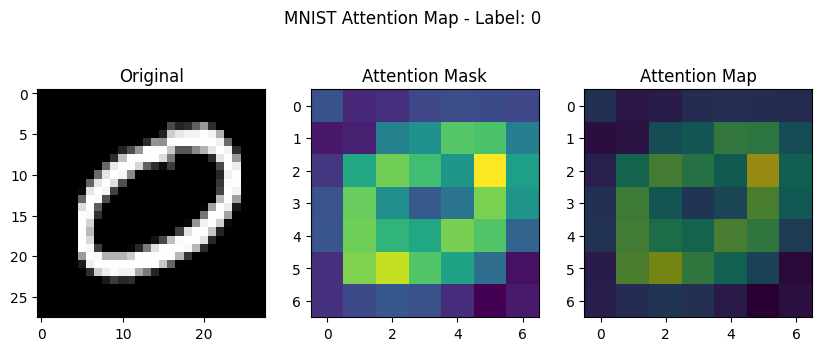

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        self.feature_map = x  # Store feature map for attention visualization
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=1, shuffle=True)

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
model.eval()

# Function to visualize attention map
def visualize_attention(image, attention_map, title):
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    axs[0].imshow(image.squeeze(), cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(attention_map, cmap='viridis')
    axs[1].set_title('Attention Mask')
    axs[2].imshow(image.squeeze(), cmap='gray')
    axs[2].imshow(attention_map, cmap='viridis', alpha=0.6)
    axs[2].set_title('Attention Map')
    plt.suptitle(title)
    plt.show()

# Get a batch of test data
examples = iter(test_loader)
images, labels = next(examples) # Use next(examples) instead of examples.next()

# Forward pass through the model
images = images.to(device)
output = model(images)

# Get the feature map from the model
feature_map = model.feature_map.detach().cpu().numpy()[0]
attention_map = np.mean(feature_map, axis=0)  # Average across channels to get attention

# Visualize the attention map
visualize_attention(images.cpu(), attention_map, title=f'MNIST Attention Map - Label: {labels.item()}')